<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/2%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Part 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install openpyxl -q
# import openpyxl
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# missing data
!pip install missingno -q
import missingno as msno

# t-test, ANOVA
from scipy import stats

# Set display options
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# apartments = pd.read_excel('https://raw.githubusercontent.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/main/apartments2.xlsx', engine='openpyxl')

In [2]:
# import pickle

!wget https://github.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/raw/main/apartments2.pkl -q

with open('apartments2.pkl', 'rb') as f:
    apartments = pickle.load(f)

### Data Protocol

In [ ]:
# Type of valaues
apartments.dtypes.to_excel("Berlin_datatype.xlsx", sheet_name='data_type')
# Maximum valaues
numeric_apartments = apartments.select_dtypes(include=['number'])
numeric_apartments.max().to_excel("max_Berlin.xlsx", sheet_name='max')
# Minimum Values
numeric_apartments.min().to_excel("min_Berlin.xlsx", sheet_name='min')
# Missing Values
apartments.isnull().sum(axis=0).to_excel("NA_Berlin.xlsx", sheet_name='NA')
# exporting results to the protocol
apartments.nunique().to_excel("unique_Berlin.xlsx", sheet_name='unique')

### Descriptive Statistics

In [3]:
apartments.shape

(23536, 39)

In [ ]:
apartments.isna().sum()

,0
Listing ID,0
Host Since,21
Host Response Time,10490
Host Response Rate,10490
Is Superhost,21
neighbourhood,0
Neighborhood Group,0
Postal Code,586
Latitude,0
Longitude,0


In [ ]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Listing ID            23536 non-null  category      
 1   Host Since            23515 non-null  datetime64[ns]
 2   Host Response Time    13046 non-null  object        
 3   Host Response Rate    13046 non-null  float64       
 4   Is Superhost          23515 non-null  object        
 5   neighbourhood         23536 non-null  object        
 6   Neighborhood Group    23536 non-null  object        
 7   Postal Code           22950 non-null  category      
 8   Latitude              23536 non-null  float64       
 9   Longitude             23536 non-null  float64       
 10  Is Exact Location     23536 non-null  object        
 11  Property Type         23536 non-null  object        
 12  Room Type             23536 non-null  object        
 13  Accomodates     

In [ ]:
apartments.describe()

,Host Since,Host Response Rate,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Polarity_min,Polarity_max,Polarity_median,Polarity_mean,Host Since Years,Last Review Years,First Review Years
count,23515,13046.000000,23536.000000,23536.000000,23536.000000,23507.000000,23516.000000,23501.000000,425.000000,23536.000000,23536.000000,23536.000000,23536.000000,19380,19380,18914.000000,18888.000000,18892.000000,18870.000000,18886.000000,18871.000000,18868.000000,18836.000000,18836.000000,18836.000000,18836.000000,23515.000000,19380.000000,19380.000000
mean,2015-04-30 16:06:01.301296896,0.918422,52.509906,13.406193,2.671737,1.095971,1.161720,1.641802,487.131765,69.612424,1.346151,6.897774,19.238826,2017-03-06 17:16:49.783281664,2018-07-06 05:33:19.504644096,94.564344,9.679850,9.334904,9.728829,9.746479,9.550315,9.417638,0.184311,0.705738,0.424939,0.432693,9.328759,6.145841,7.477837
min,2008-08-08 00:00:00,0.000000,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2009-06-20 00:00:00,2011-08-22 00:00:00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.295003,5.292266,5.292266
25%,2013-11-16 00:00:00,0.950000,52.489177,13.375730,2.000000,1.000000,1.000000,1.000000,0.000000,32.000000,1.000000,2.000000,1.000000,2016-02-18 18:00:00,2018-01-15 00:00:00,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.066667,0.533799,0.371667,0.382761,7.942505,5.349760,6.140999
50%,2015-06-04 00:00:00,1.000000,52.509210,13.416575,2.000000,1.000000,1.000000,1.000000,420.000000,49.000000,1.000000,3.000000,5.000000,2017-07-09 00:00:00,2019-01-02 00:00:00,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.194375,0.705243,0.423246,0.433333,9.234771,5.653662,7.137577
75%,2016-09-18 00:00:00,1.000000,52.532670,13.439532,3.000000,1.000000,1.000000,2.000000,753.000000,75.000000,1.000000,4.000000,17.000000,2018-07-08 00:00:00,2019-04-23 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.319490,0.922292,0.475000,0.482567,10.781656,6.617385,8.523614
max,2019-05-13 00:00:00,1.000000,52.651670,13.757640,16.000000,8.500000,10.000000,22.000000,4639.000000,9000.000000,16.000000,1000.000000,545.000000,2019-05-14 00:00:00,2019-05-14 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,16.054757,13.018480,15.189596
std,NaN,0.194479,0.031279,0.058574,1.567812,0.346150,0.660736,1.228642,517.652098,216.660408,0.856297,24.879032,40.360483,NaN,NaN,7.599949,0.737798,1.031248,0.695275,0.679600,0.748713,0.840456,0.229045,0.233672,0.114445,0.112404,2.024152,1.094957,1.631504


In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

Value counts for column 'Listing ID' :
Listing ID
2695        1
22915502    1
22915111    1
22915044    1
22914994    1
           ..
12360371    1
12357350    1
12357208    1
12355147    1
34682315    1
Name: count, Length: 23536, dtype: int64
NaN values: 0 


Value counts for column 'Host Since' :
Host Since
2013-08-19    59
2017-02-20    52
2016-01-17    47
2016-02-19    39
2016-08-02    37
              ..
2011-06-03     1
2011-03-28     1
2017-10-15     1
2011-06-28     1
2009-08-25     1
Name: count, Length: 3085, dtype: int64
NaN values: 21 


Value counts for column 'Host Response Time' :
Host Response Time
within an hour        6816
within a few hours    2913
within a day          2767
a few days or more     550
Name: count, dtype: int64
NaN values: 10490 


Value counts for column 'Is Superhost' :
Is Superhost
f    19948
t     3567
Name: count, dtype: int64
NaN values: 21 


Value counts for column 'neighbourhood' :
neighbourhood
NeukÃ¶lln                    3444
Prenzlauer B

### Autoviz report

In [ ]:
# !pip install autoviz -q
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline
# AV = AutoViz_Class()
# AV.AutoViz('', dfte = apartments)

## Data Visualisation

### Missing data

<Axes: >

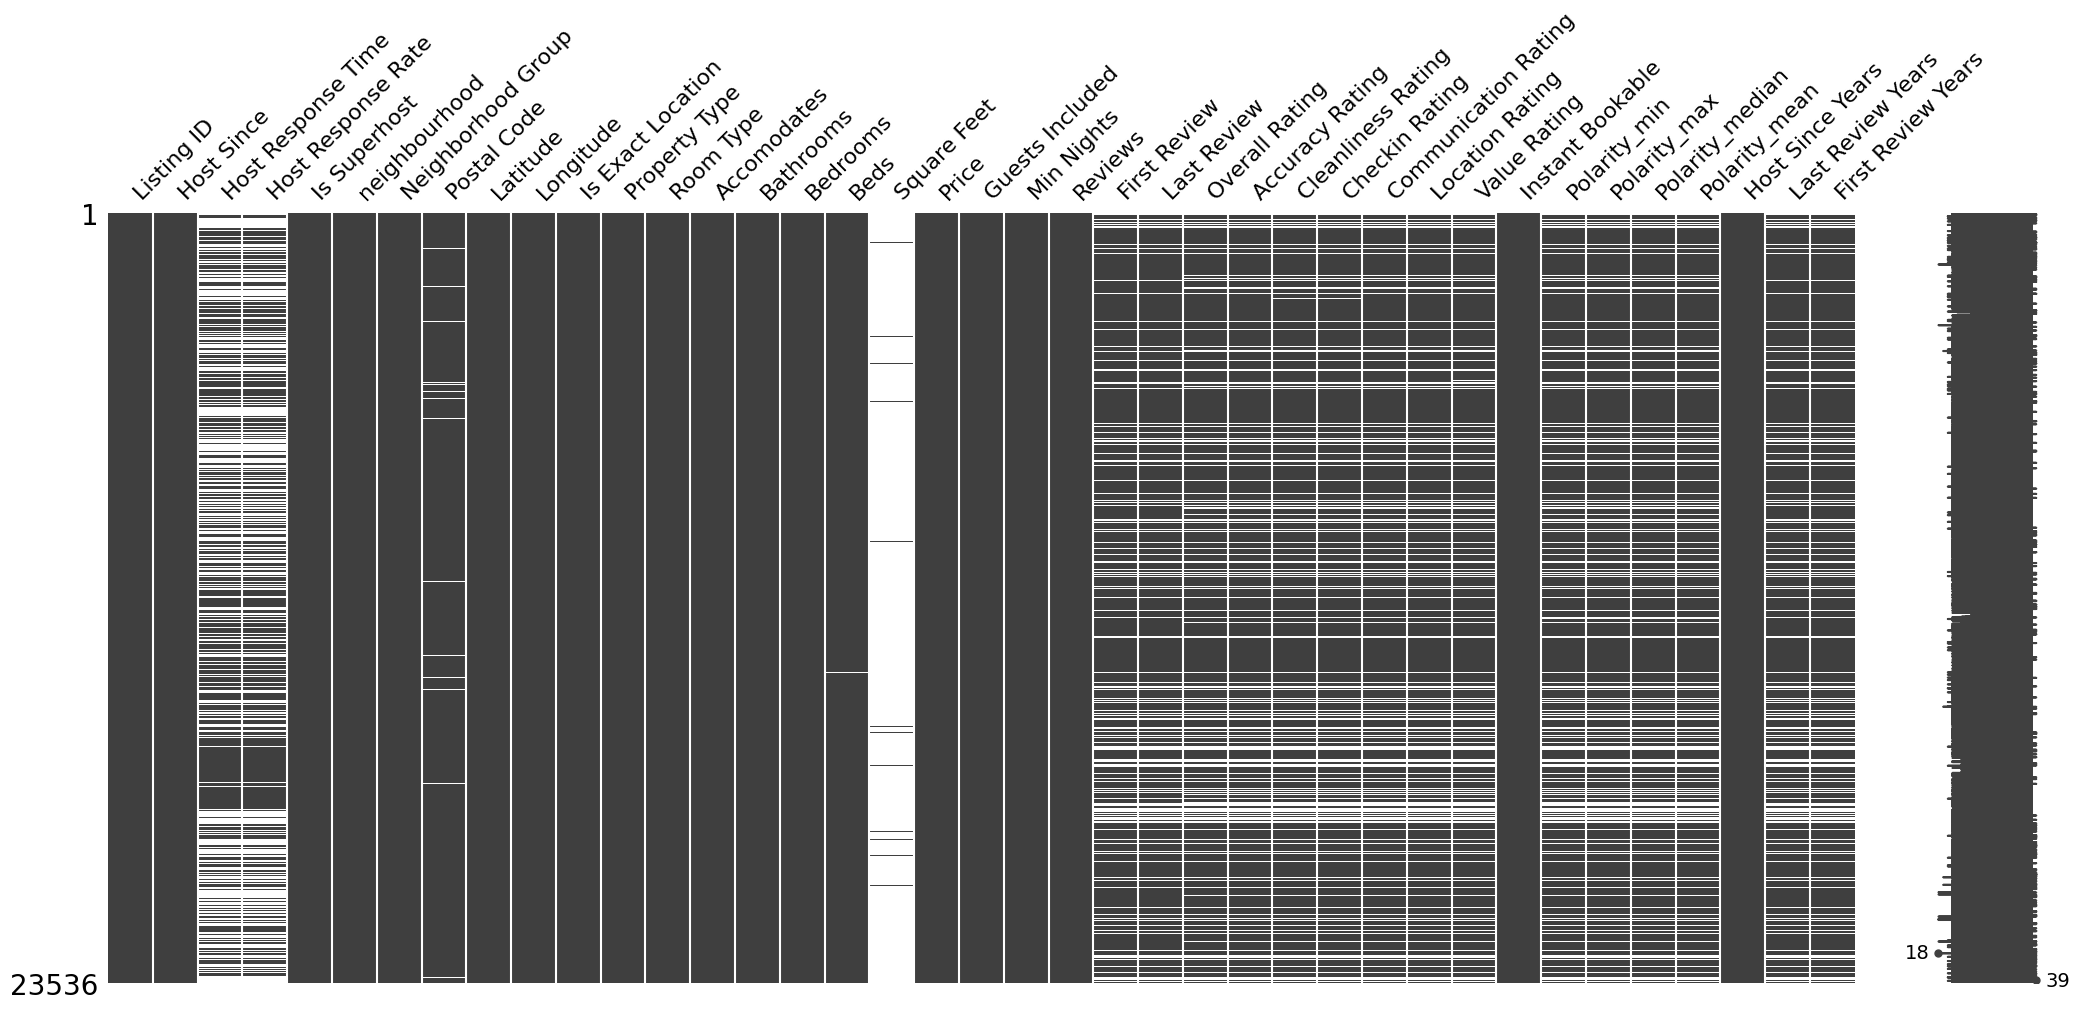

In [ ]:
# !pip install missingno -q
# import missingno as msno

msno.matrix(apartments)

### Numeric data visualisation

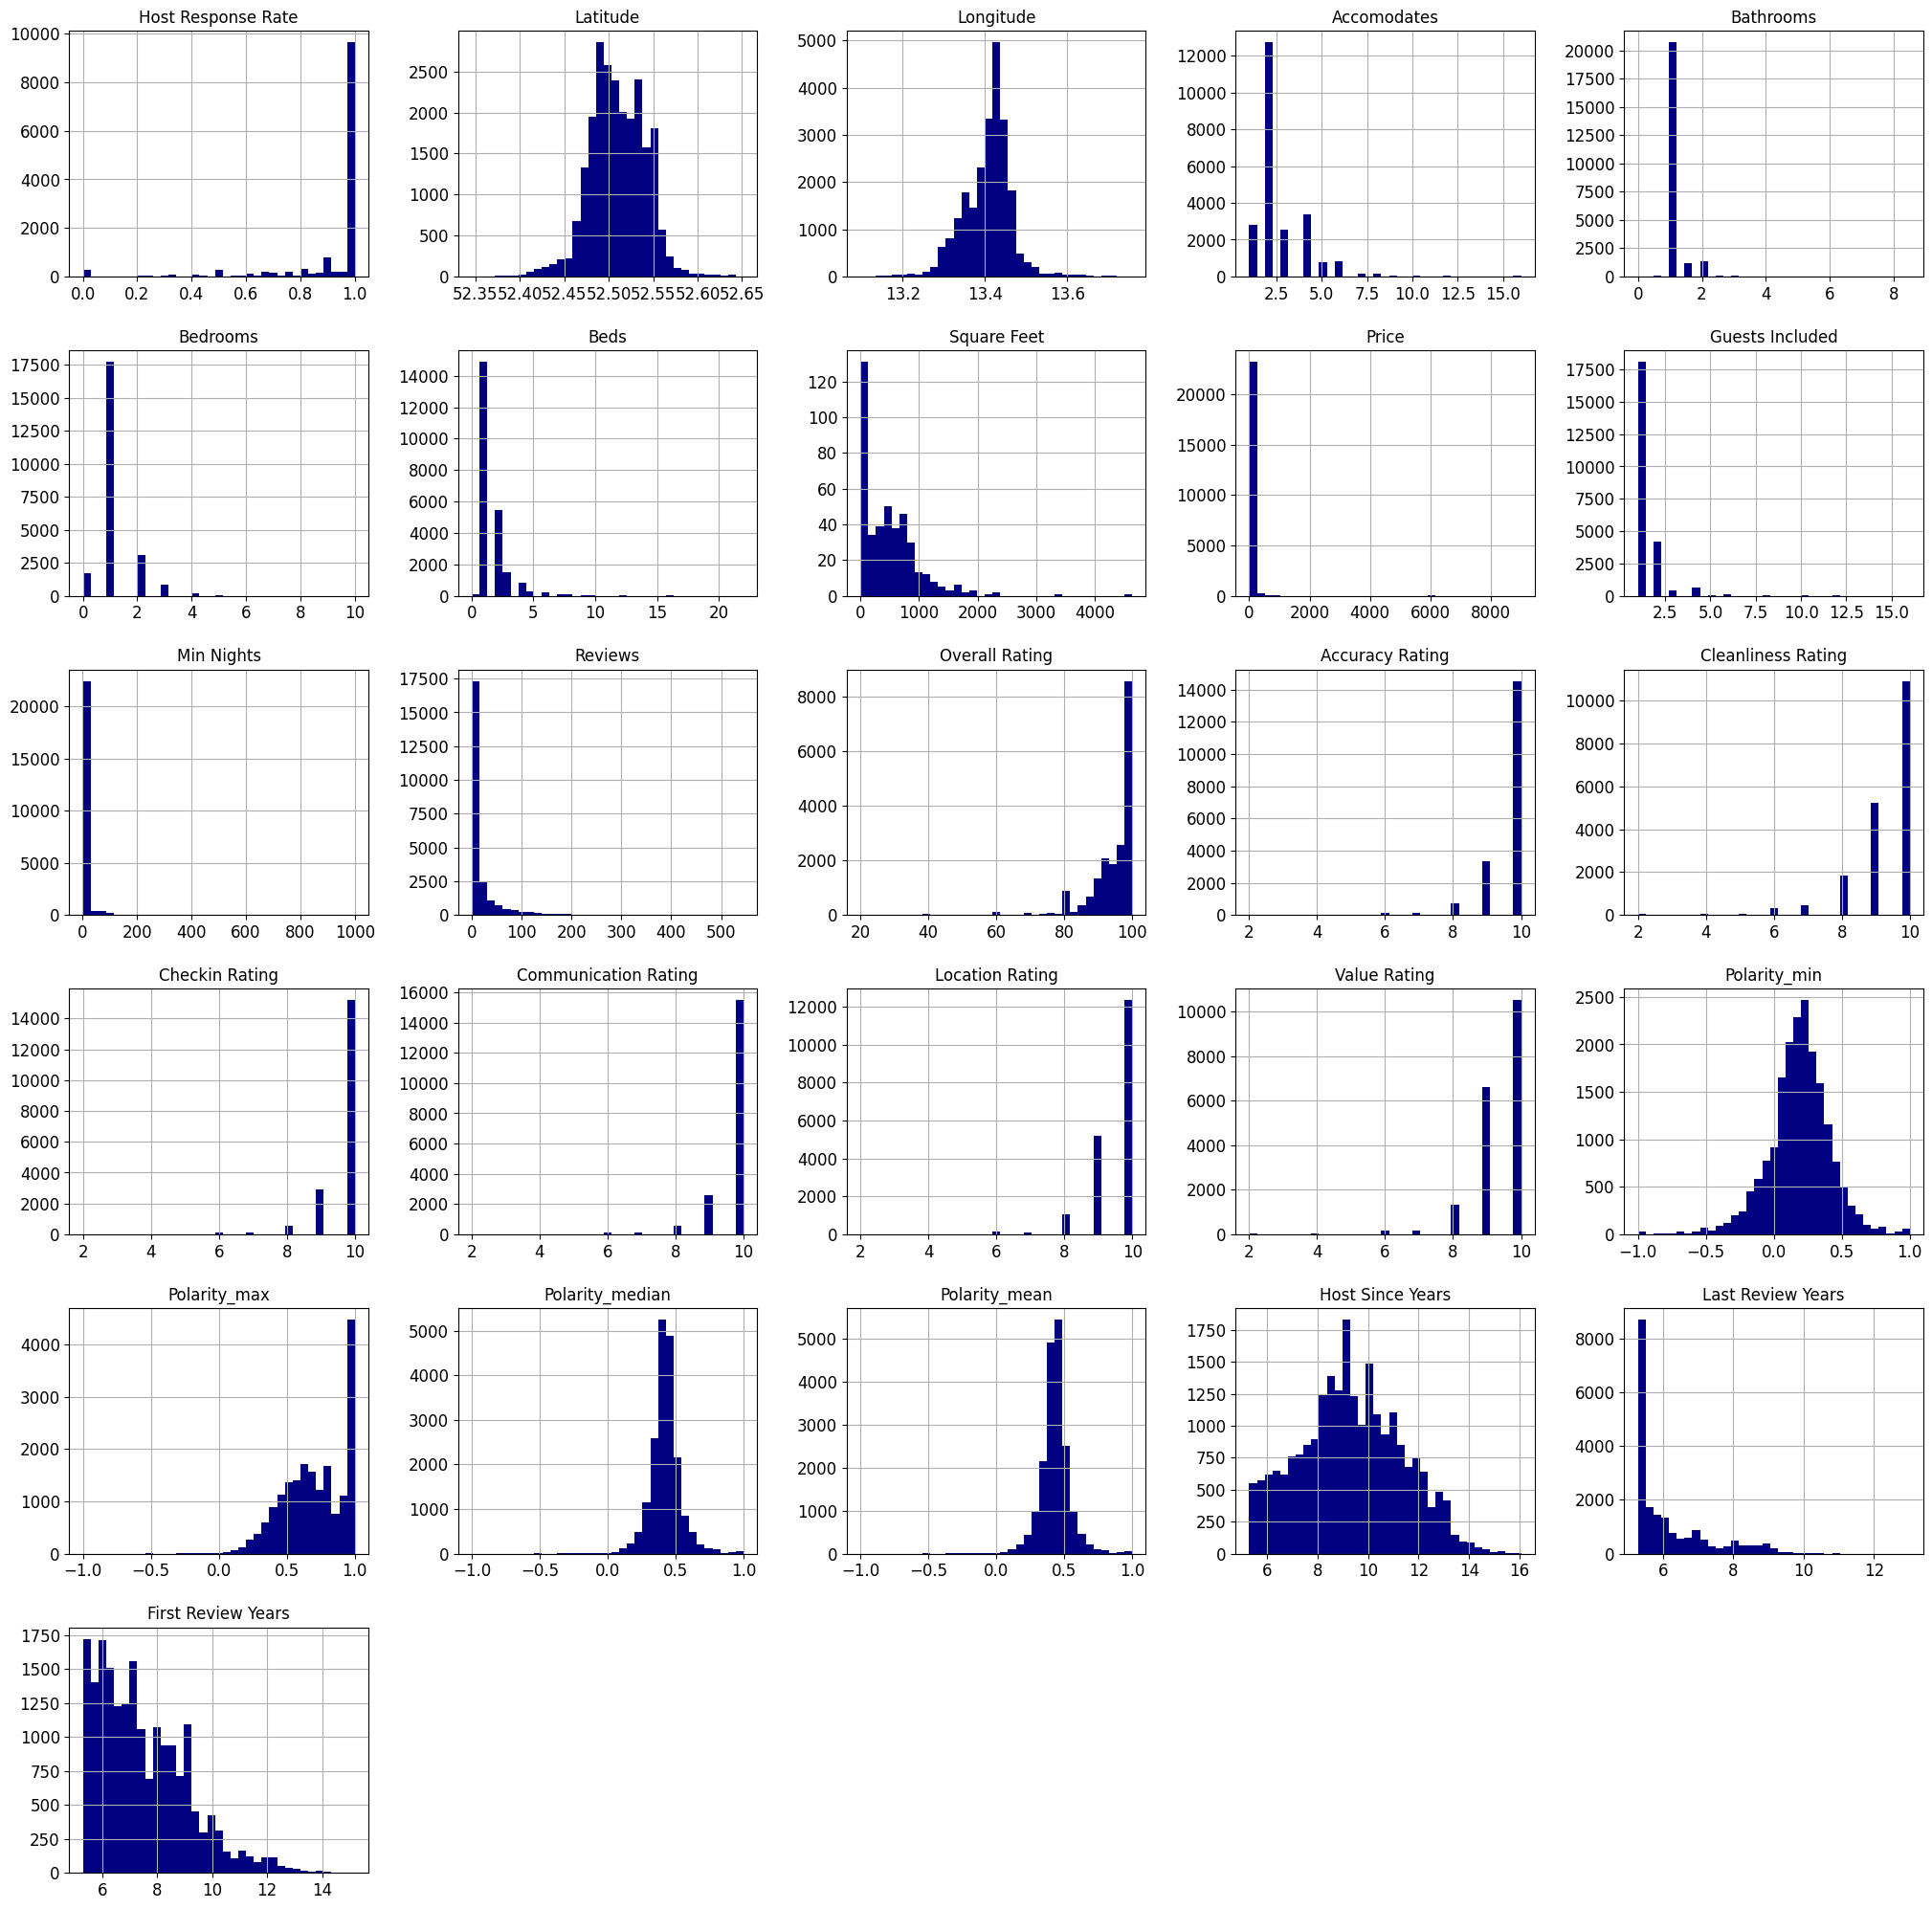

In [ ]:
numeric_cols = apartments.select_dtypes(include='number').columns
apartments[numeric_cols].hist(figsize=(25, 25), bins=35, xlabelsize=12, ylabelsize=12, color = "navy");

### Pairplot

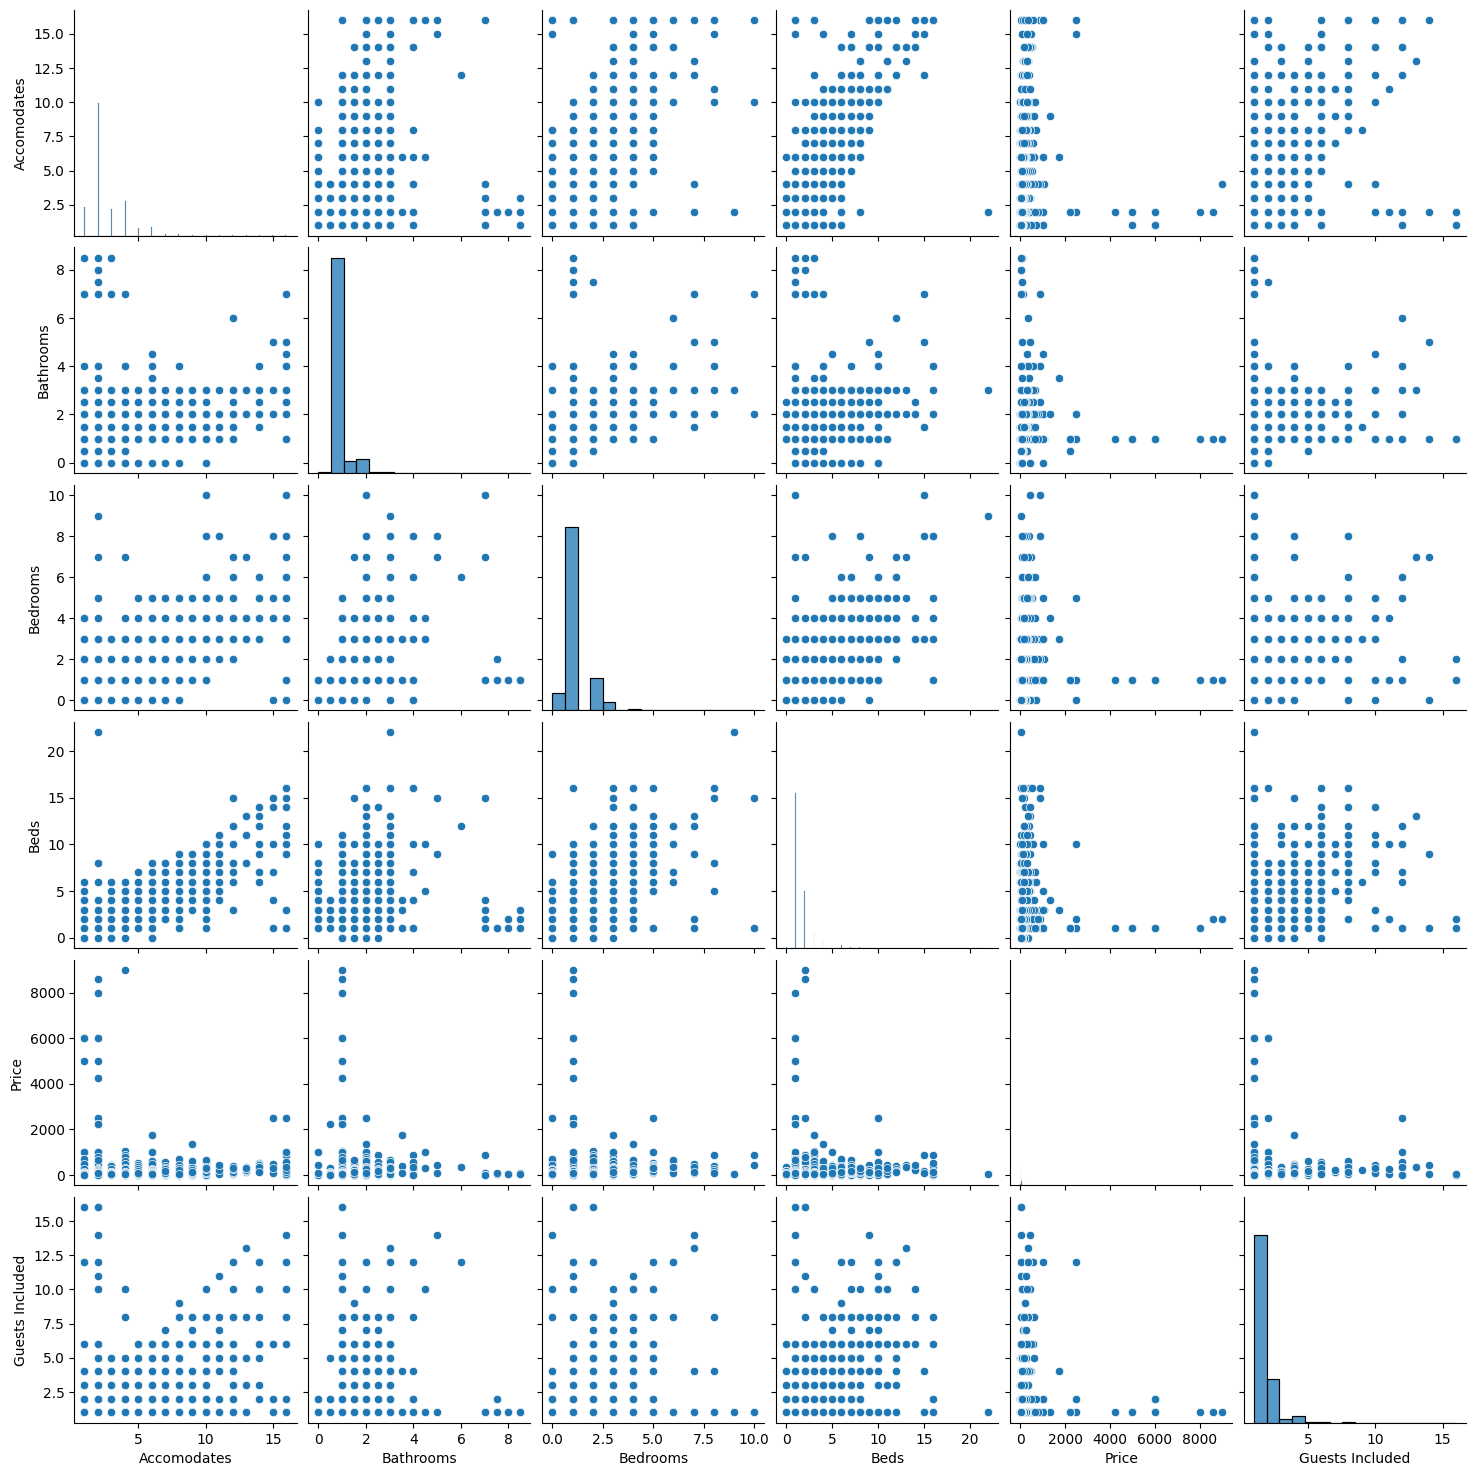

In [ ]:
numeric_cols1 = ['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included']
sns.pairplot(apartments[numeric_cols1])

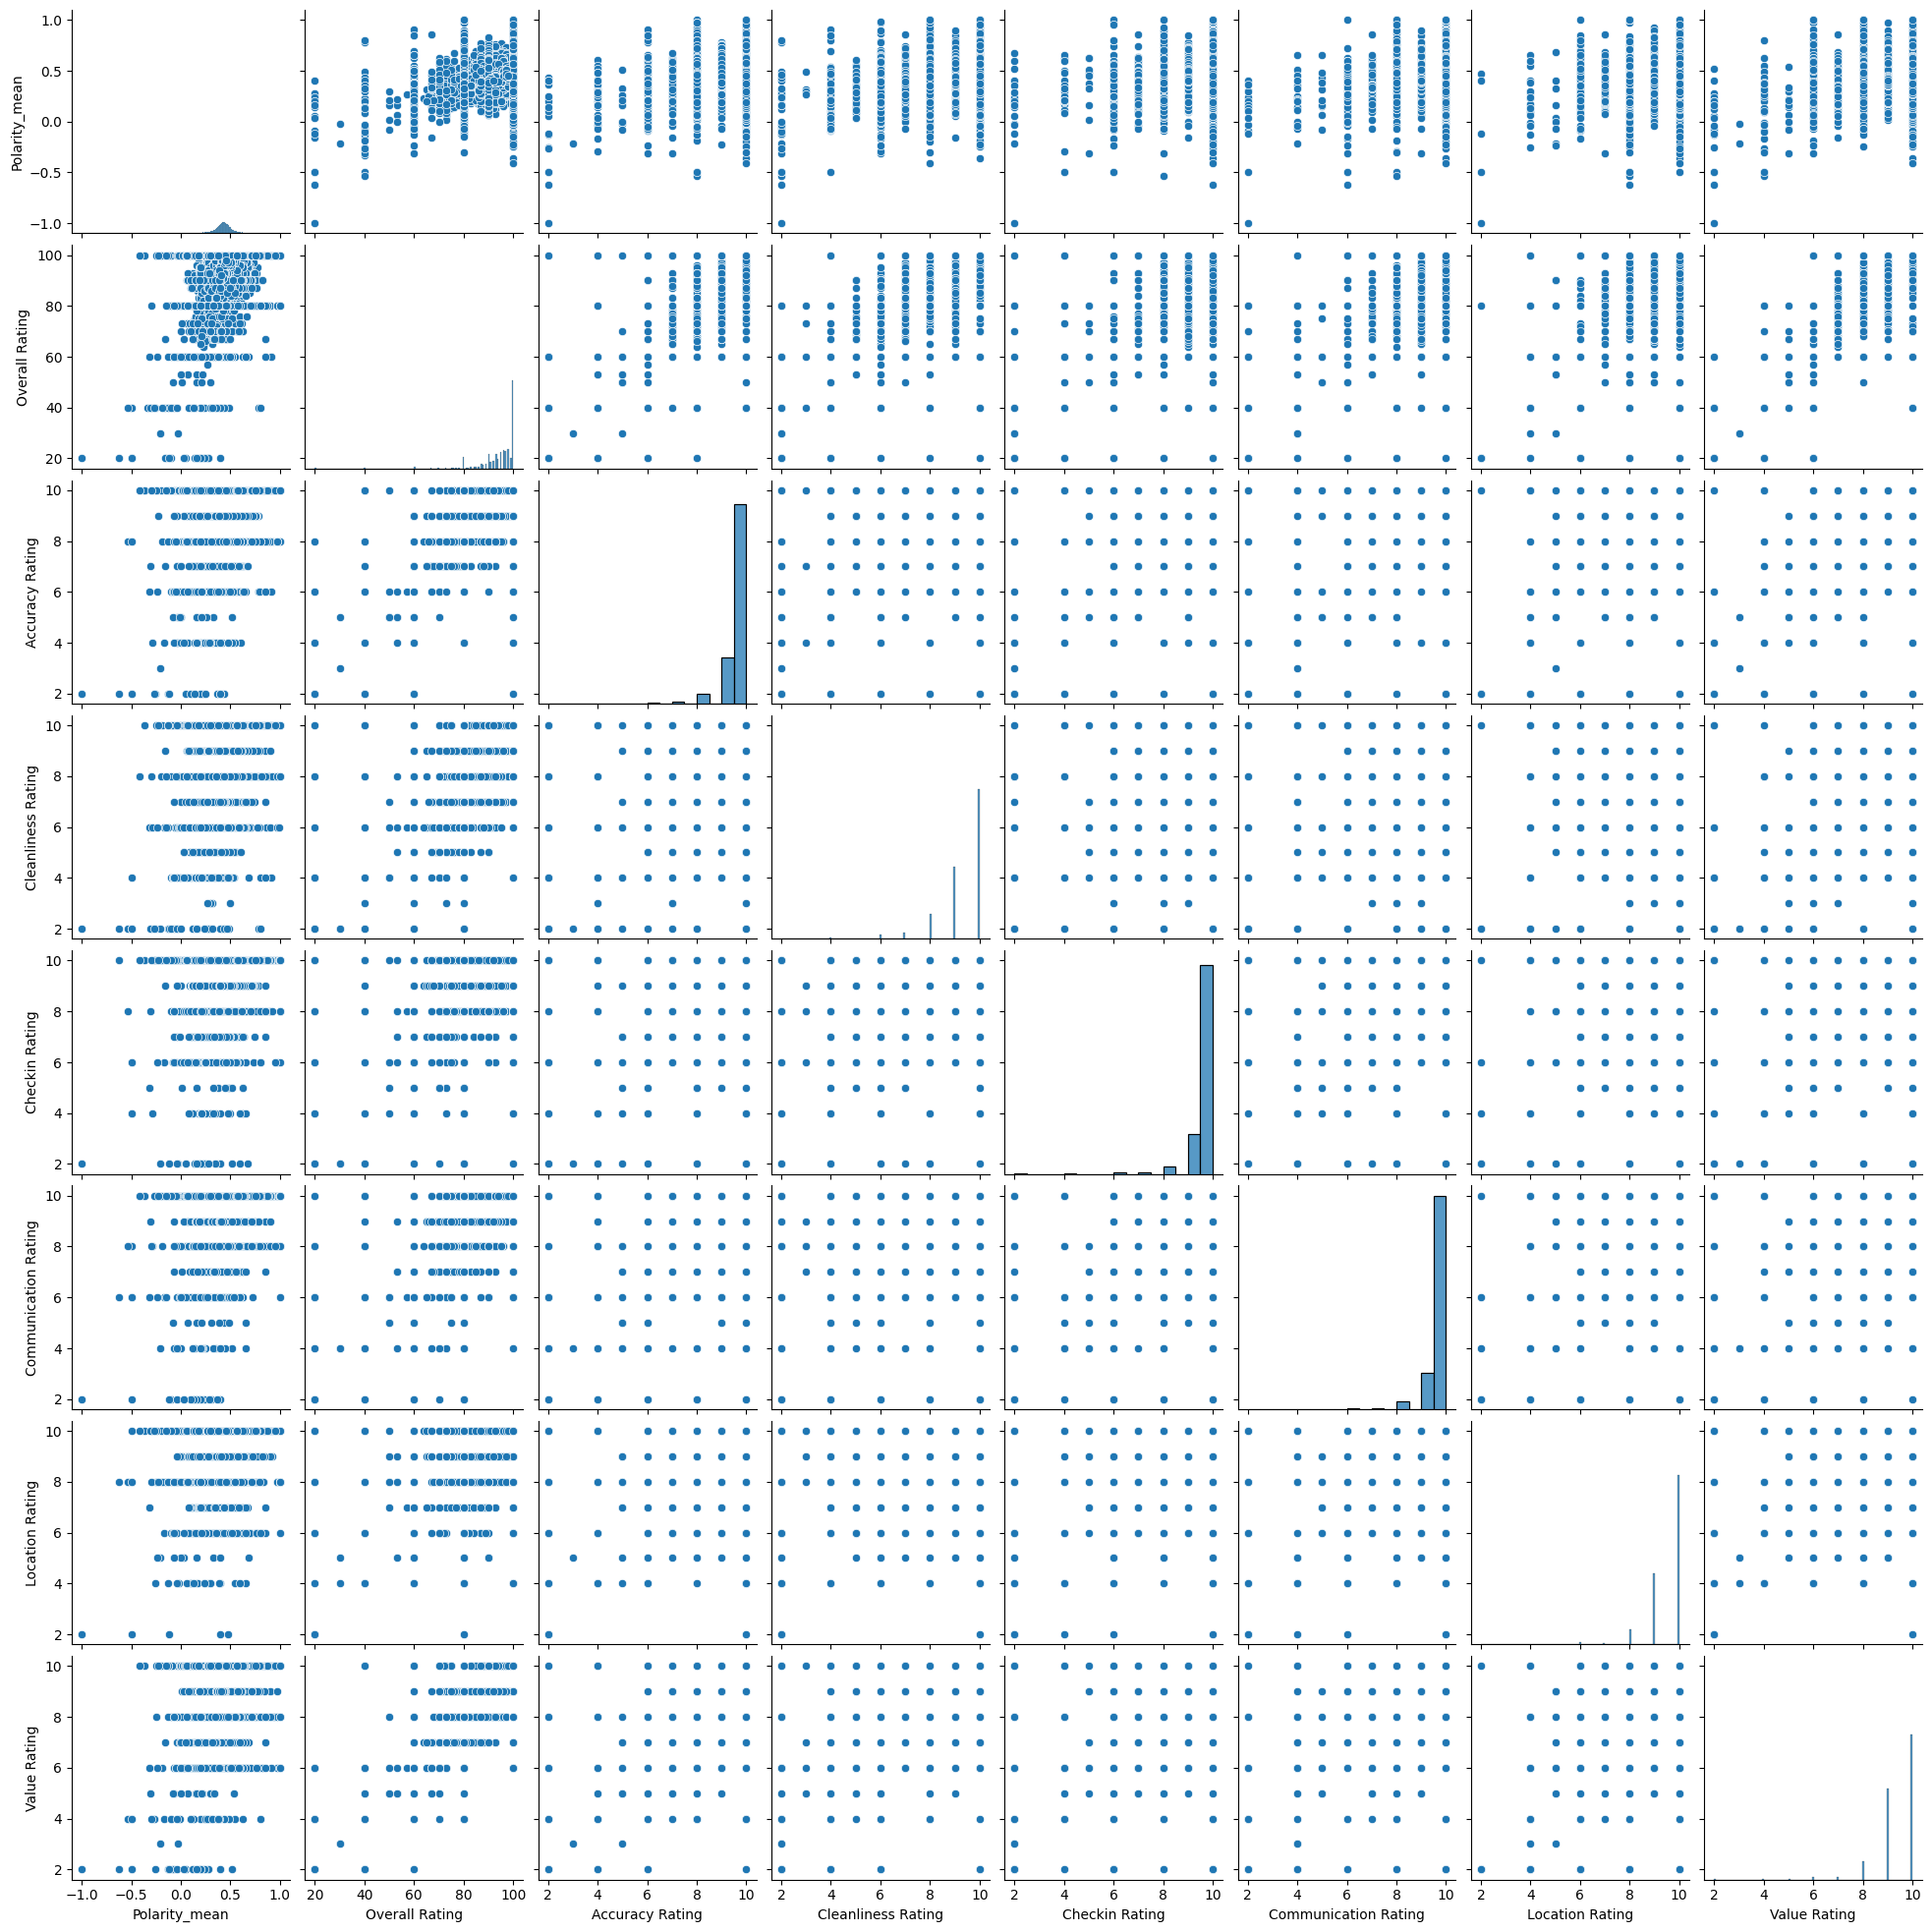

In [ ]:
# numeric_cols2 = ['Polarity_mean', 'Overall Rating', 'Accuracy Rating',
#        'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
#        'Location Rating', 'Value Rating']
# sns.pairplot(apartments[numeric_cols2])

### Categorica data visualisation

In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
categorical_cols = categorical_cols.drop(['Listing ID', 'Host Since', 'First Review', 'Last Review', 'Postal Code'])

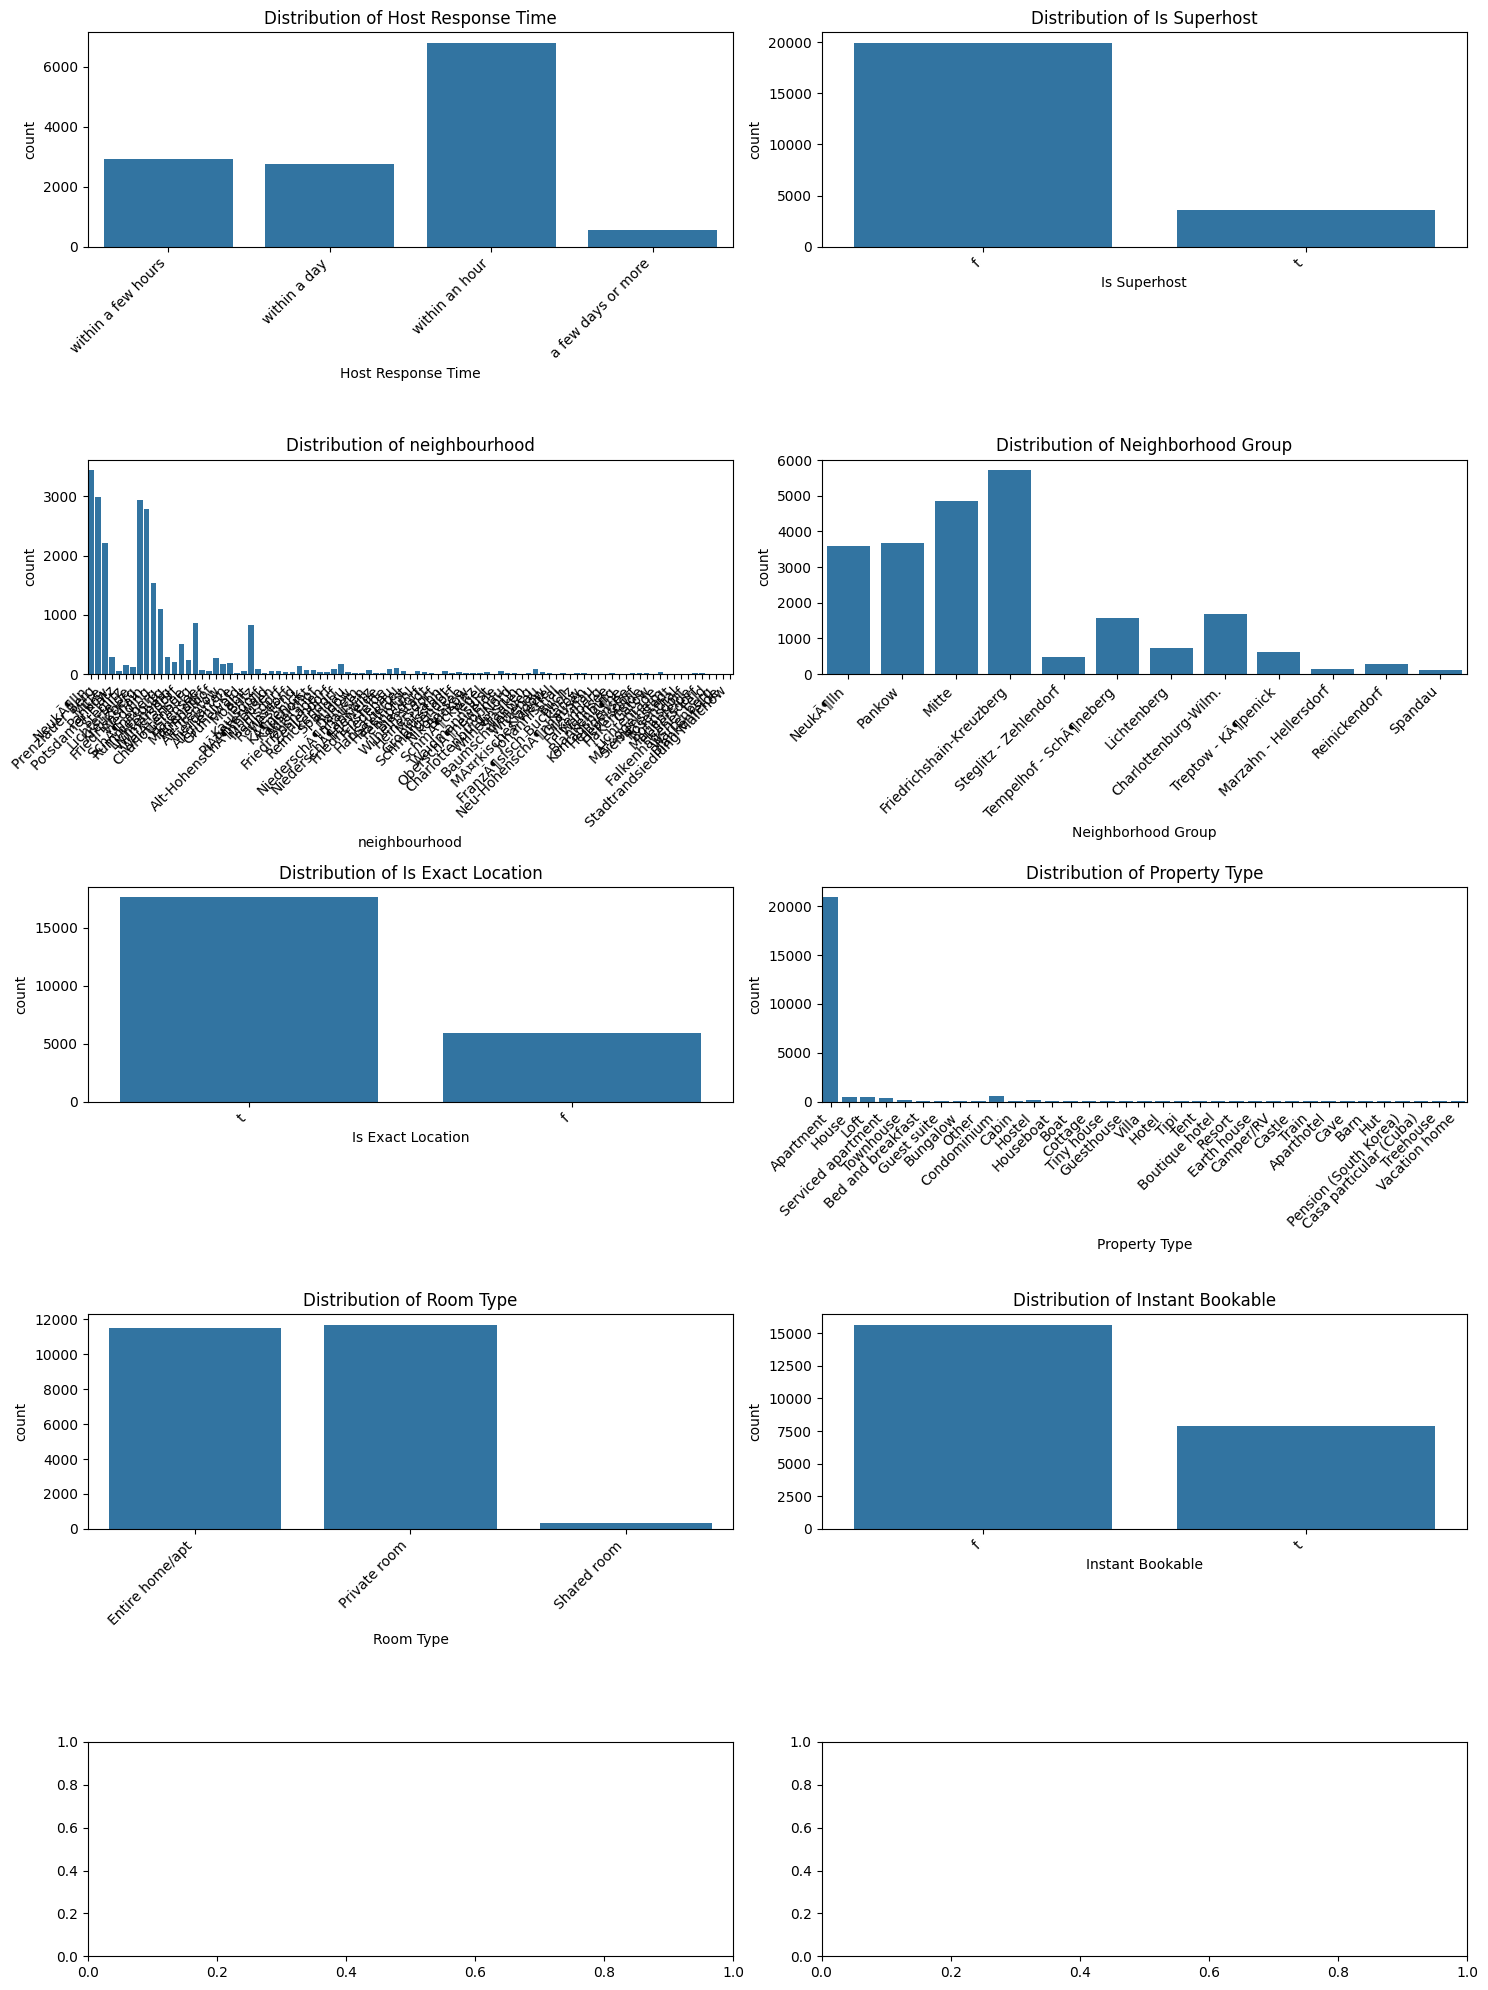

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=apartments, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Skewness for numeric_cols

In [ ]:
skewness_values = apartments[numeric_cols].skew().sort_values()
print(skewness_values)

Communication Rating    -4.747904
Checkin Rating          -4.577088
Accuracy Rating         -4.105561
Overall Rating          -3.390181
Host Response Rate      -3.094403
Value Rating            -2.680106
Location Rating         -2.601043
Cleanliness Rating      -2.478964
Polarity_min            -0.486000
Polarity_max            -0.441690
Longitude               -0.247408
Polarity_mean           -0.182371
Latitude                -0.121761
Polarity_median          0.004126
Host Since Years         0.104632
First Review Years       0.909941
Last Review Years        1.505043
Bedrooms                 2.235585
Square Feet              2.326157
Accomodates              2.652933
Beds                     3.661029
Reviews                  4.350674
Guests Included          5.123136
Bathrooms                6.774987
Min Nights              21.513526
Price                   26.846364
dtype: float64


## Correlations

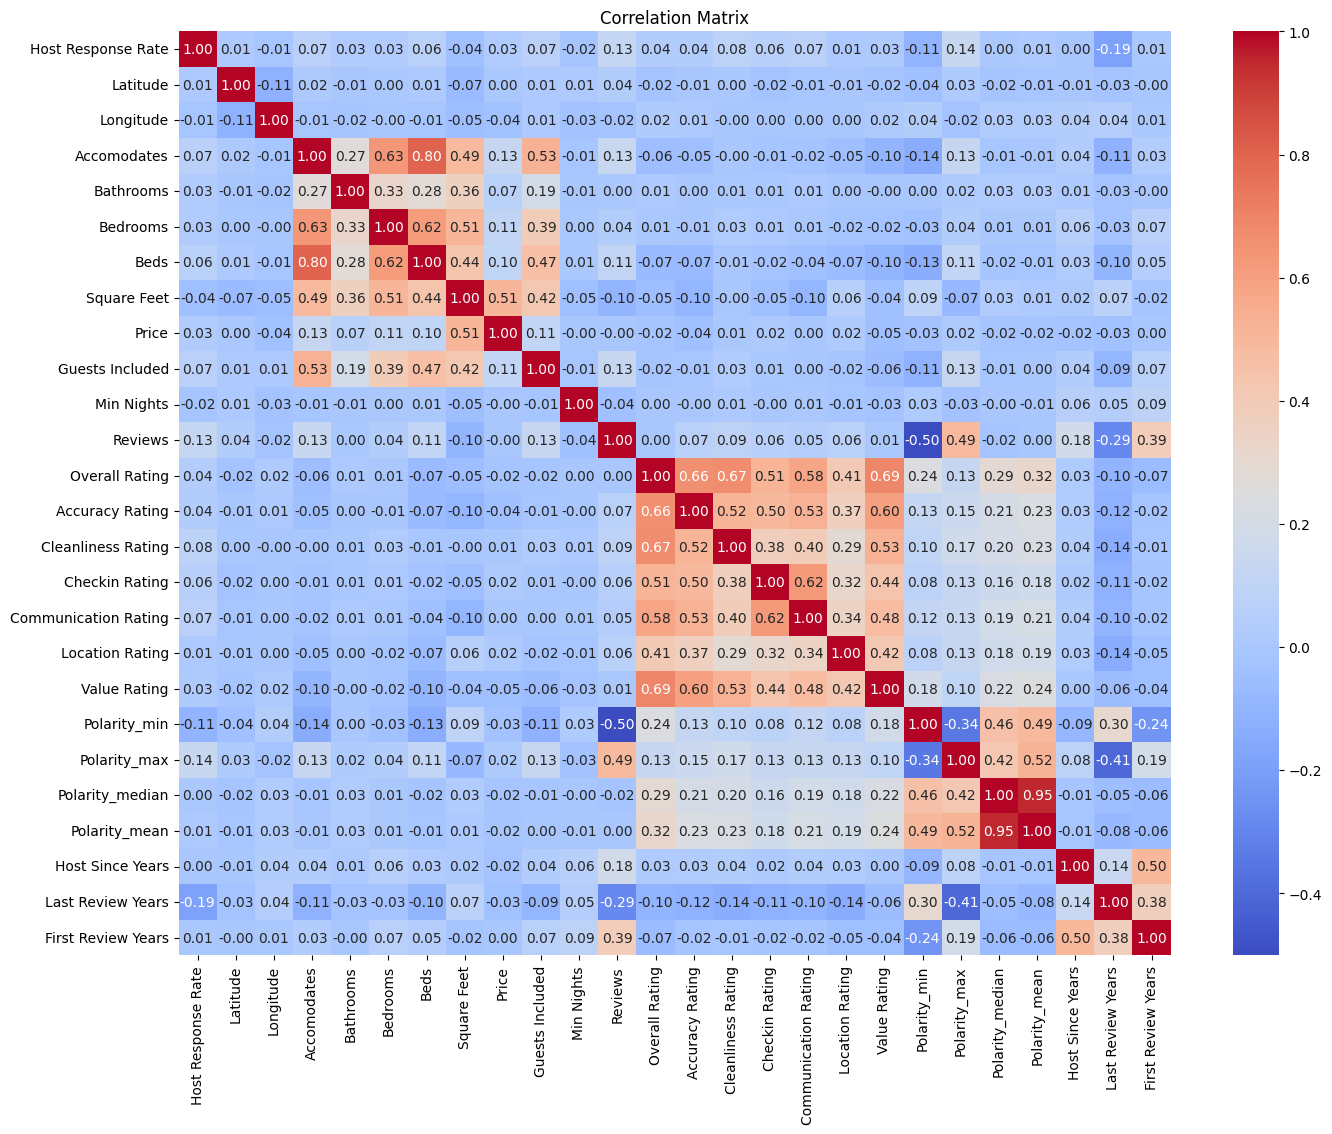

In [ ]:
numeric_cols = apartments.select_dtypes(include='number').columns

corr_matrix = apartments[numeric_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Отображаем значения до 2 знаков после запятой
plt.title('Correlation Matrix')
plt.show()

## ANOVA for Neighborhood Group by Price

In [6]:
apartments_grouped = apartments.groupby('Neighborhood Group')['Price'].agg(['count', 'mean', 'std'])
apartments_grouped.columns = ['count apartments', 'mean price', 'std price']
apartments_grouped = apartments_grouped.sort_values('count apartments', ascending=False)
apartments_grouped

,count apartments,mean price,std price
Neighborhood Group,,,
Friedrichshain-Kreuzberg,5726,63.669403,130.526143
Mitte,4865,72.411922,90.419254
Pankow,3687,71.902631,139.465741
NeukÃ¶lln,3587,48.189573,34.763792
Charlottenburg-Wilm.,1676,111.727327,510.850024
Tempelhof - SchÃ¶neberg,1586,98.278058,473.577261
Lichtenberg,743,66.970390,345.999017
Treptow - KÃ¶penick,626,53.988818,40.053303
Steglitz - Zehlendorf,468,58.905983,57.051085


In [ ]:
#from scipy import stats

groups = [group[1].values for group in apartments['Price'].groupby(apartments['Neighborhood Group'])]

fvalue, pvalue = stats.f_oneway(*groups)

print(f"F-value: {fvalue:.2f}")
print(f"P-value: {pvalue:.3f}")

alpha = 0.05
if pvalue < alpha:
    print("There are statistically significant differences in prices between Neighborhood Groups")
else:
    print("There are not statistically significant differences in prices between Neighborhood Groups")

F-value: 12.88
P-value: 0.000
There are statistically significant differences in prices between Neighborhood Groups


## t-test for Neighborhood Group by Price

In [ ]:
apartments.groupby('Neighborhood Group')['Price'].agg(['count', 'mean', 'std']).sort_values(by='count', ascending=False)

,count,mean,std
Neighborhood Group,,,
Friedrichshain-Kreuzberg,5726,63.669403,130.526143
Mitte,4865,72.411922,90.419254
Pankow,3687,71.902631,139.465741
NeukÃ¶lln,3587,48.189573,34.763792
Charlottenburg-Wilm.,1676,111.727327,510.850024
Tempelhof - SchÃ¶neberg,1586,98.278058,473.577261
Lichtenberg,743,66.970390,345.999017
Treptow - KÃ¶penick,626,53.988818,40.053303
Steglitz - Zehlendorf,468,58.905983,57.051085


In [ ]:
# from scipy import stats

neighborhood_groups = apartments['Neighborhood Group'].unique()
p_values = pd.DataFrame(index=neighborhood_groups, columns=neighborhood_groups)

for group1 in neighborhood_groups:
  for group2 in neighborhood_groups:
    if group1 != group2:
      group1_prices = apartments[apartments['Neighborhood Group'] == group1]['Price']
      group2_prices = apartments[apartments['Neighborhood Group'] == group2]['Price']
      t_statistic, p_value = stats.ttest_ind(group1_prices, group2_prices, equal_var=False)
      p_values.loc[group1, group2] = round(p_value, 3)

p_values.fillna('', inplace=True)
shortened_names = {name: name[:10] for name in neighborhood_groups}
p_values.rename(index=shortened_names, columns=shortened_names, inplace=True)
p_values


,NeukÃ¶lln,Pankow,Mitte,Friedrichs,Steglitz -,Tempelhof,Lichtenber,Charlotten,Treptow -,Marzahn -,Reinickend,Spandau
NeukÃ¶lln,,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.001,0.002,0.068,0.073
Pankow,0.0,,0.847,0.004,0.0,0.03,0.702,0.002,0.0,0.007,0.0,0.002
Mitte,0.0,0.847,,0.0,0.0,0.031,0.67,0.002,0.0,0.002,0.0,0.0
Friedrichs,0.0,0.004,0.0,,0.131,0.004,0.797,0.0,0.0,0.372,0.0,0.111
Steglitz -,0.0,0.0,0.0,0.131,,0.001,0.534,0.0,0.111,0.819,0.0,0.588
Tempelhof,0.0,0.03,0.031,0.004,0.001,,0.072,0.435,0.0,0.002,0.0,0.001
Lichtenber,0.14,0.702,0.67,0.797,0.534,0.072,,0.012,0.311,0.597,0.085,0.42
Charlotten,0.0,0.002,0.002,0.0,0.0,0.435,0.012,,0.0,0.0,0.0,0.0
Treptow -,0.001,0.0,0.0,0.0,0.111,0.0,0.311,0.0,,0.147,0.0,0.644
Marzahn -,0.002,0.007,0.002,0.372,0.819,0.002,0.597,0.0,0.147,,0.0,0.509


In [ ]:
# apartments.to_excel('apartments_3.xlsx', index=False)

In [ ]:
# import pickle

with open('apartments3.pkl', 'wb') as f:
    pickle.dump(apartments, f)

-------------------end of 2-----------------------